# Naive Bayes' Classifier 

In [1]:
docs = ["win a free ticket", "claim your free prize now", "let’s catch up for coffee"]


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(docs)

vocab = vectorizer.get_feature_names_out()
print("Vocabulary:", vocab)
print("TF-IDF Matrix:\n", x.toarray())

Vocabulary: ['catch' 'claim' 'coffee' 'for' 'free' 'let' 'now' 'prize' 'ticket' 'up'
 'win' 'your']
TF-IDF Matrix:
 [[0.         0.         0.         0.         0.4736296  0.
  0.         0.         0.62276601 0.         0.62276601 0.        ]
 [0.         0.46735098 0.         0.         0.35543247 0.
  0.46735098 0.46735098 0.         0.         0.         0.46735098]
 [0.4472136  0.         0.4472136  0.4472136  0.         0.4472136
  0.         0.         0.         0.4472136  0.         0.        ]]


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import pandas as pd
from collections import defaultdict
import re

In [4]:
# LOad Dataset

train_df = pd.read_csv("train_imdb.csv")
test_df = pd.read_csv("test_imdb.csv")

#Split into features and labels
x_train = train_df['text']
y_train = train_df['label']
x_test = test_df['text']
y_test = test_df['label']

# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=5000)
x_train_vec  = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)




In [5]:
class NaiveBayesClassifier:
    def __init__(self):
        # Dictionary to count word occurrences in spam messages
        self.spam_count = defaultdict(int)
        # Dictionary to count word occurrences in ham (non-spam) messages
        self.ham_count = defaultdict(int)
        # Total number of words in spam messages
        self.spam_total_words = 0
        # Total number of words in ham messages
        self.ham_total_words = 0
        # Set to store the vocabulary (unique words)
        self.vocab = set()
        # Prior probability of a message being spam
        self.p_spam = 0.0
    def preprocess(self, text):
        # Convert text to lowercase and extract words with at least 2 letters
        words = re.findall(r'\b[a-z]{2,}\b', text.lower())
        return words

    def fit(self, texts, labels):
        # Separate texts into spam and ham based on labels
        spam_docs = [texts[i] for i in range(len(texts)) if labels[i] == 1]
        ham_docs = [texts[i] for i in range(len(texts)) if labels[i] == 0]
        # Calculate prior probability of spam
        self.p_spam = len(spam_docs) / len(texts)

        # Count word occurrences in spam documents
        for doc in spam_docs:
            words = self.preprocess(doc)
            for word in words:
                self.spam_count[word] += 1  # Increment count for this word in spam
                self.spam_total_words += 1  # Increment total spam word count
                self.vocab.add(word)        # Add word to vocabulary set

        # Count word occurrences in ham (non-spam) documents
        for doc in ham_docs:
            words = self.preprocess(doc)
            for word in words:
                self.ham_count[word] += 1   # Increment count for this word in ham
                self.ham_total_words += 1   # Increment total ham word count
                self.vocab.add(word)        # Add word to vocabulary set

In [6]:
import numpy as np
import re
from collections import defaultdict

class NaiveBayesClassifier:
    def __init__(self):
        self.spam_count = defaultdict(int)
        self.ham_count = defaultdict(int)
        self.spam_total_words = 0
        self.ham_total_words = 0
        self.vocab = set()
        self.p_spam = 0.0

    def preprocess(self, text):
        words = re.findall(r'\b[a-z]{2,}\b', text.lower())
        return words

    def fit(self, texts, labels):
        spam_docs = [texts[i] for i in range(len(texts)) if labels[i] == 1]
        ham_docs = [texts[i] for i in range(len(texts)) if labels[i] == 0]
        self.p_spam = len(spam_docs) / len(texts)

        for doc in spam_docs:
            words = self.preprocess(doc)
            for word in words:
                self.spam_count[word] += 1
                self.spam_total_words += 1
                self.vocab.add(word)

        for doc in ham_docs:
            words = self.preprocess(doc)
            for word in words:
                self.ham_count[word] += 1
                self.ham_total_words += 1
                self.vocab.add(word)

    def predict(self, text):
        words = self.preprocess(text)
        spam_score = np.log(self.p_spam)
        ham_score = np.log(1 - self.p_spam)
        vocab_size = len(self.vocab)

        for word in words:
            spam_word_prob = (self.spam_count[word] + 1) / (self.spam_total_words + vocab_size)
            ham_word_prob = (self.ham_count[word] + 1) / (self.ham_total_words + vocab_size)
            spam_score += np.log(spam_word_prob)
            ham_score += np.log(ham_word_prob)

        return 1 if spam_score > ham_score else 0


In [7]:
nb = NaiveBayesClassifier()
nb.fit(x_train, y_train)


In [8]:
def predict_batch(model, messages):
    return [model.predict(msg) for msg in messages]

In [9]:
y_pred = predict_batch(nb, x_test)

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.81456
Confusion Matrix:
 [[11003  1497]
 [ 3139  9361]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83     12500
           1       0.86      0.75      0.80     12500

    accuracy                           0.81     25000
   macro avg       0.82      0.81      0.81     25000
weighted avg       0.82      0.81      0.81     25000



# Linear regression

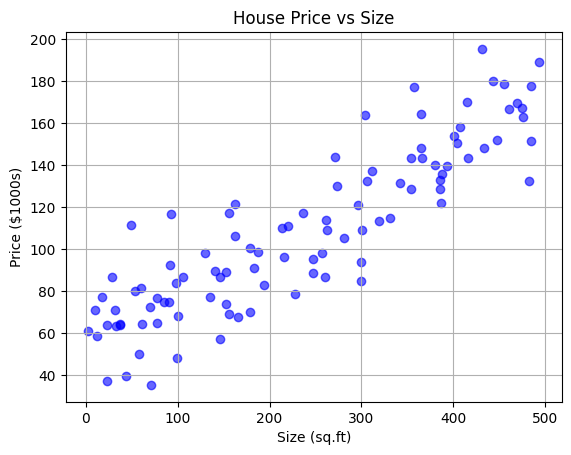

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Fake data: size (in sq.ft) and corresponding price (in $1000s)
np.random.seed(42)
X = np.random.rand(100) * 500  # house size between 0 and 500 sq.ft
noise = np.random.randn(100) * 20  # random noise
y = 50 + 0.25 * X + noise  # underlying pattern: price = 50 + 0.25 * size + noise

# Plot it
plt.scatter(X, y, color='blue', alpha=0.6)
plt.xlabel('Size (sq.ft)')
plt.ylabel('Price ($1000s)')
plt.title('House Price vs Size')
plt.grid(True)
plt.show()


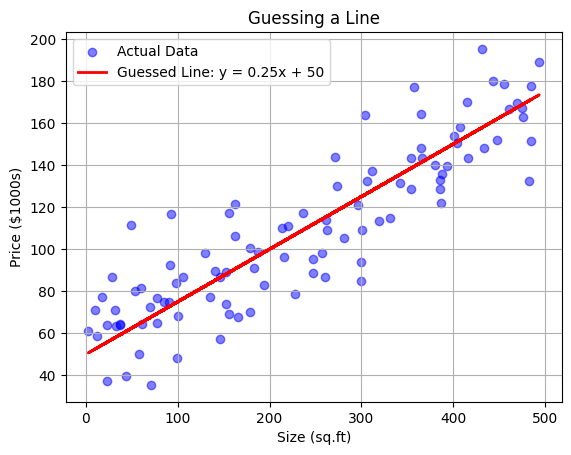

In [12]:
# Manually pick values for w and b (slope and intercept)
w_guess = 0.25
b_guess = 50

# Predicted values using the guessed line
y_hat = w_guess * X + b_guess

# Plot real data and the guessed line
plt.scatter(X, y, color='blue', alpha=0.5, label='Actual Data')
plt.plot(X, y_hat, color='red', linewidth=2, label='Guessed Line: y = 0.25x + 50')
plt.xlabel('Size (sq.ft)')
plt.ylabel('Price ($1000s)')
plt.title('Guessing a Line')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate fake data
np.random.seed(42)
X = np.random.rand(100) * 500
noise = np.random.randn(100) * 20
y = 50 + 0.25 * X + noise

# Fix: smaller learning rate
w = 0
b = 0
lr = 0.0000001  # much smaller
epochs = 300

losses = []

for epoch in range(epochs):
    y_hat = w * X + b
    error = y - y_hat
    loss = np.mean(error ** 2)
    losses.append(loss)

    dw = (-2 / n) * np.sum(X * error)
    db = (-2 / n) * np.sum(error)

    w -= lr * dw
    b -= lr * db

    if epoch % 50 == 0:
        print(f"Epoch {epoch:03}: Loss = {loss:.2f}, w = {w:.4f}, b = {b:.4f}")


# Step 4: Plot final result
plt.scatter(X, y, alpha=0.5, label="Data")
plt.plot(X, w * X + b, color='red', label=f"Fitted Line: y = {w:.2f}x + {b:.2f}")
plt.xlabel("Size (sq.ft)")
plt.ylabel("Price ($1000s)")
plt.title("Linear Regression Fit via Gradient Descent")
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'n' is not defined

In [ ]:
# Fix: smaller learning rate
w = 0
b = 0
lr = 0.0000001  # much smaller
epochs = 300

losses = []

for epoch in range(epochs):
    y_hat = w * X + b
    error = y - y_hat
    loss = np.mean(error ** 2)
    losses.append(loss)

    dw = (-2 / n) * np.sum(X * error)
    db = (-2 / n) * np.sum(error)

    w -= lr * dw
    b -= lr * db

    if epoch % 50 == 0:
        print(f"Epoch {epoch:03}: Loss = {loss:.2f}, w = {w:.4f}, b = {b:.4f}")


# Logistic regression

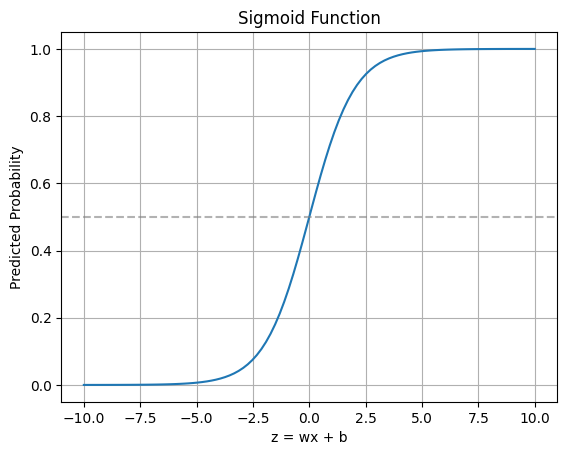

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 100 points between -10 and 10 for the x-axis (z)
z = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-z))

plt.plot(z, sigmoid)
plt.title("Sigmoid Function")
plt.xlabel("z = wx + b")
plt.ylabel("Predicted Probability")
plt.grid(True)
plt.axhline(0.5, color='gray', linestyle='--', alpha=0.6)
plt.show()


## Binary Cross Entropy or Log LOss

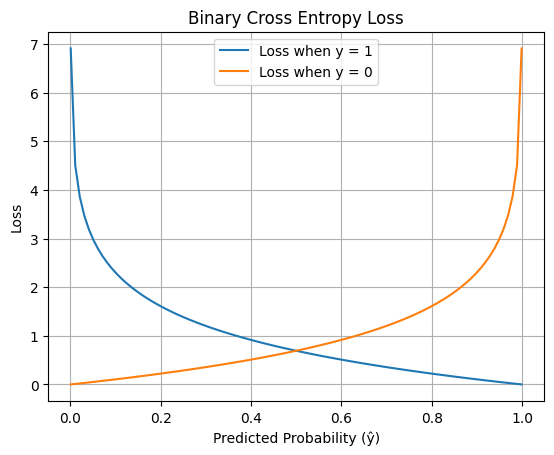

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Predicted probabilities
y_hat = np.linspace(0.001, 0.999, 100)

# Case 1: True label is 1
loss_y1 = -np.log(y_hat)

# Case 2: True label is 0
loss_y0 = -np.log(1 - y_hat)

plt.plot(y_hat, loss_y1, label='Loss when y = 1')
plt.plot(y_hat, loss_y0, label='Loss when y = 0')
plt.xlabel('Predicted Probability (ŷ)')
plt.ylabel('Loss')
plt.title('Binary Cross Entropy Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-15  # to avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
# True label = 1, prediction = 0.95 (good)
print(binary_cross_entropy(1, 0.95))  # ≈ 0.051

# True label = 1, prediction = 0.1 (bad)
print(binary_cross_entropy(1, 0.1))   # ≈ 2.30

# True label = 0, prediction = 0.05 (good)
print(binary_cross_entropy(0, 0.05))  # ≈ 0.05

# True label = 0, prediction = 0.99 (very bad)
print(binary_cross_entropy(0, 0.99))  # ≈ 4.60


0.05129329438755058
2.3025850929940455
0.05129329438755058
4.605170185988091


In [ ]:
# Generate dummy binary classification data
np.random.seed(1)
X = np.random.randn(100, 1) * 2
y = (X[:, 0] > 0).astype(int)  # label = 1 if x > 0 else 0

# Initialize parameters
w = 0.0
b = 0.0
lr = 0.1
epochs = 200
losses = []
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


# Training loop
for epoch in range(epochs):
    z = w * X[:, 0] + b
    y_hat = sigmoid(z)

    loss = np.mean(binary_cross_entropy(y, y_hat))
    losses.append(loss)

    # Gradients
    dz = y_hat - y
    dw = np.dot(X[:, 0], dz) / len(X)
    db = np.mean(dz)

    # Update
    w -= lr * dw
    b -= lr * db

    if epoch % 20 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}, w = {w:.4f}, b = {b:.4f}")


Epoch 0: Loss = 0.6931, w = 0.0708, b = 0.0030
Epoch 20: Loss = 0.3314, w = 0.8461, b = 0.0315
Epoch 40: Loss = 0.2529, w = 1.2322, b = 0.0454
Epoch 60: Loss = 0.2146, w = 1.5051, b = 0.0574
Epoch 80: Loss = 0.1907, w = 1.7214, b = 0.0688
Epoch 100: Loss = 0.1739, w = 1.9030, b = 0.0795
Epoch 120: Loss = 0.1612, w = 2.0610, b = 0.0897
Epoch 140: Loss = 0.1512, w = 2.2016, b = 0.0994
Epoch 160: Loss = 0.1430, w = 2.3289, b = 0.1085
Epoch 180: Loss = 0.1361, w = 2.4456, b = 0.1171


In [ ]:
def predict(X, w, b, threshold=0.5):
    z = w * X + b
    probs = sigmoid(z)
    return (probs >= threshold).astype(int)

# Make predictions
y_pred = predict(X[:, 0], w, b)

# Accuracy
accuracy = np.mean(y_pred == y)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.99


In [ ]:
import numpy as np
def sigmoid(x):
    return 1/ (1+np.exp(-x))


In [ ]:
sigmoid(5)

np.float64(0.9933071490757153)

In [ ]:
sigmoid(0)

np.float64(0.5)

In [ ]:
sigmoid(-5)

np.float64(0.0066928509242848554)

In [ ]:
def BCE(y_test, y_pred):
    epsilon = np.clip(y_pred, 1e-15, 1-1e-15)
    return (-(np.dot(y_test, np.log(y_pred))+ np.dot((1- y_test), np.log(1 - y_pred)))/len(y_test))

In [ ]:
print(BCE(np.array([1]), np.array([0.99])))

0.01005033585350145


In [ ]:
print(BCE(np.array([0]), np.array([0.99])))


4.605170185988091


In [ ]:
print(BCE(np.array([1,0,1]), np.array([0.95, 0.2, 0.8])))


0.16586013233865668


In [ ]:
import numpy as np

# Generate fake data
np.random.seed(1)
X = np.random.randn(100, 1) * 2   # shape: (100, 1)
y = (X[:, 0] > 0).astype(int)     # label is 1 if x > 0 else 0


In [ ]:
w = 0.0
b = 0.0
lr = 0.1
epochs = 200
losses = []

for epoch in range(epochs):
    z = w * X[:,0] + b
    y_hat = sigmoid(z)
    loss = BCE(y, y_hat)
    losses.append(loss)
    ## Prediction error
    dz = y_hat - y
    dw=  np.dot(X[:,0], dz)/len(X)
    db = np.mean(dz)
    w -= lr * dw
    b -= lr * db
    if epoch % 20 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}, w = {w:.4f}, b = {b:.4f}")


Epoch 0: Loss = 0.6931, w = 0.0708, b = 0.0030
Epoch 20: Loss = 0.3314, w = 0.8461, b = 0.0315
Epoch 40: Loss = 0.2529, w = 1.2322, b = 0.0454
Epoch 60: Loss = 0.2146, w = 1.5051, b = 0.0574
Epoch 80: Loss = 0.1907, w = 1.7214, b = 0.0688
Epoch 100: Loss = 0.1739, w = 1.9030, b = 0.0795
Epoch 120: Loss = 0.1612, w = 2.0610, b = 0.0897
Epoch 140: Loss = 0.1512, w = 2.2016, b = 0.0994
Epoch 160: Loss = 0.1430, w = 2.3289, b = 0.1085
Epoch 180: Loss = 0.1361, w = 2.4456, b = 0.1171


In [ ]:
def predict(X, w, b, threshold=0.5):
    z = w * X + b
    probs = sigmoid(z)
    return (probs >= threshold).astype(int)


In [ ]:
y_pred = predict(X[:, 0], w, b)


In [ ]:
accuracy = np.mean(y_pred == y)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.99


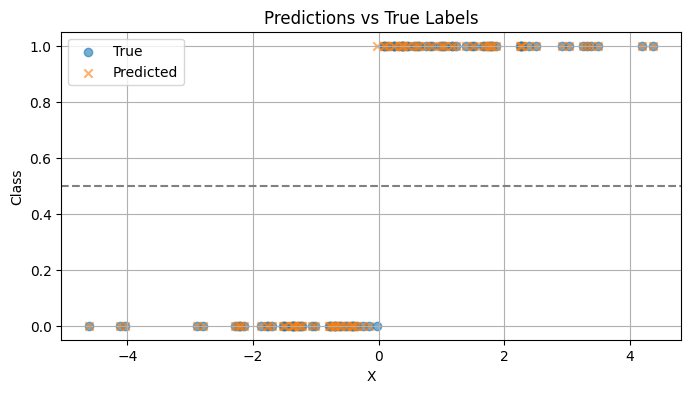

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], y, label="True", alpha=0.6)
plt.scatter(X[:, 0], y_pred, label="Predicted", marker="x", alpha=0.6)
plt.axhline(0.5, color="gray", linestyle="--")
plt.title("Predictions vs True Labels")
plt.xlabel("X")
plt.ylabel("Class")
plt.legend()
plt.grid(True)
plt.show()
